In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from IPython.display import Image

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS

import gezi, melt
from deepiu.util import text2ids
from libgezi import utf82gbk, gbk2utf8

tensorflow_version: 1.1.0-rc0


Warning, no conf.py in current path use util conf


In [5]:
image_path = '/home/gezi/data/imgs/im2txt/usa-campus.jpg'

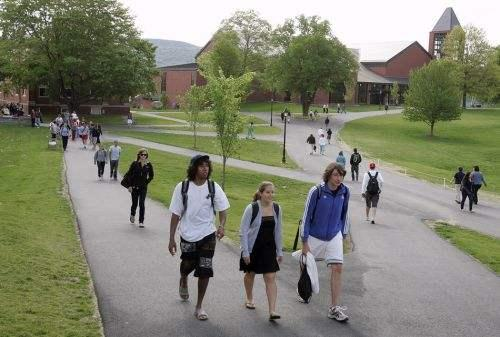

In [6]:
Image(image_path)

In [7]:
image_model_checkpoint_path = '/home/gezi/data/inceptionv3/inception_v3.ckpt'

In [8]:
image_model = melt.image.ImageModel(image_model_checkpoint_path)

INFO:tensorflow:Restoring image variables from checkpoint file /home/gezi/data/inceptionv3/inception_v3.ckpt
INFO:tensorflow:Restoring parameters from /home/gezi/data/inceptionv3/inception_v3.ckpt


In [9]:
vocab_path = '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt'
text2ids.init(vocab_path)

ENCODE_UNK 0


In [10]:
print(image_model.process_one_image(image_path))

[[ 0.84288526  0.46960288  1.21487272 ...,  0.44443575  0.33863923
   0.86755276]]


In [11]:
model_dir = '/home/gezi/new/temp/image-caption/keyword/model/showandtell/'
predictor = melt.Predictor(model_dir)

restore from /home/gezi/new/temp/image-caption/keyword/model/showandtell/model.ckpt-23.7-916000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/keyword/model/showandtell/model.ckpt-23.7-916000


import graph ok /home/gezi/new/temp/image-caption/keyword/model/showandtell/model.ckpt-23.7-916000.meta
restore ok /home/gezi/new/temp/image-caption/keyword/model/showandtell/model.ckpt-23.7-916000


In [12]:
def predict(predictor, image_path):
  timer = gezi.Timer()
  image_feature = image_model.process_one_image(image_path)
  text, score = predictor.inference(['text', 'text_score'], 
                                    feed_dict= {
                                      'show_and_tell/model_init_1/image_feature:0': image_feature
                                      })
  
  for result in text:
    print(gbk2utf8(text2ids.ids2text(result)), 'decode time(ms):', timer.elapsed_ms())
  
  timer = gezi.Timer()
  texts, scores = predictor.inference(['beam_text', 'beam_text_score'], 
                                    feed_dict= {
                                      'show_and_tell/model_init_1/image_feature:0': image_feature
                                      })

  texts = texts[0]
  scores = scores[0]
  for text, score in zip(texts, scores):
    print(gbk2utf8(text2ids.ids2text(text)), score)

  print('beam_search using time(ms):', timer.elapsed_ms())

  score = predictor.inference(['score'], 
                              feed_dict= {
                                      FLAGS.image_feature_name_: image_features,
                                      FLAGS.text_name: word_ids_list
                                      })

predict(predictor, image_path)


公园/ / / / / / / / / / / / / / / / / / /  decode time(ms): 2115.46802521
大学/校园/<EOS> 0.00216089
公园/散步/<EOS> 0.00194046
公园/<EOS> 0.0013961
大学/校园/图片/<EOS> 0.00105578
大学/校园/环境/<EOS> 0.000725312
公园/运动/<EOS> 0.000548478
公园/健身/<EOS> 0.000513717
厦门/大学/<EOS> 0.000462472
大学/校园/风光/<EOS> 0.000392866
大学/女生/<EOS> 0.000351381
beam_search using time(ms): 4288.67101669
